Source environment:
# # # # # # # # # # # 
# > . . . . . . . . # 
# . . . . . . . . . # 
# # . . . . . . . . # 
# . . . . . . . . . # 
# . . . . . . . . . # 
# . . . . . . . . . # 
# . . . . . . . . . # 
# . . . # . . . . . # 
# . . . . . . . . G # 
# # # # # # # # # # # 

Exploring source environment to build successor representation...
Episode 10, Steps: 539, Reward: -4.38
Episode 20, Steps: 324, Reward: -2.23
Episode 30, Steps: 1000, Reward: -10.00
Episode 40, Steps: 1000, Reward: -10.00
Episode 50, Steps: 475, Reward: -3.74
Episode 60, Steps: 1000, Reward: -10.00
Episode 70, Steps: 533, Reward: -4.32
Episode 80, Steps: 619, Reward: -5.18
Episode 90, Steps: 453, Reward: -3.52
Episode 100, Steps: 391, Reward: -2.90
Episode 110, Steps: 1000, Reward: -10.00
Episode 120, Steps: 719, Reward: -6.18
Episode 130, Steps: 308, Reward: -2.07
Episode 140, Steps: 1000, Reward: -10.00
Episode 150, Steps: 1000, Reward: -10.00
Episode 160, Steps: 161, Reward: -0.60
Episode 170, Steps: 1000, Reward:

<ipython-input-1-c6a102907382>:232: ComplexWarning: Casting complex values to real discards the imaginary part
  self.Q[state][action] += self.alpha * td_error


Option 1, Episode 20, Steps: 1000
Option 1, Episode 30, Steps: 1000
Option 1, Episode 40, Steps: 1000
Option 1, Episode 50, Steps: 1000
Option 1, Episode 60, Steps: 1000
Option 1, Episode 70, Steps: 1000
Option 1, Episode 80, Steps: 1000
Option 1, Episode 90, Steps: 1000
Option 1, Episode 100, Steps: 1000
Training option 2...
Option 2, Episode 10, Steps: 1000
Option 2, Episode 20, Steps: 1000
Option 2, Episode 30, Steps: 1000
Option 2, Episode 40, Steps: 1000
Option 2, Episode 50, Steps: 1000
Option 2, Episode 60, Steps: 1000
Option 2, Episode 70, Steps: 1000
Option 2, Episode 80, Steps: 1000
Option 2, Episode 90, Steps: 1000
Option 2, Episode 100, Steps: 1000
Training option 3...
Option 3, Episode 10, Steps: 1000
Option 3, Episode 20, Steps: 1000
Option 3, Episode 30, Steps: 1000
Option 3, Episode 40, Steps: 487
Option 3, Episode 50, Steps: 1000
Option 3, Episode 60, Steps: 1000
Option 3, Episode 70, Steps: 1000
Option 3, Episode 80, Steps: 1000
Option 3, Episode 90, Steps: 1000
Optio

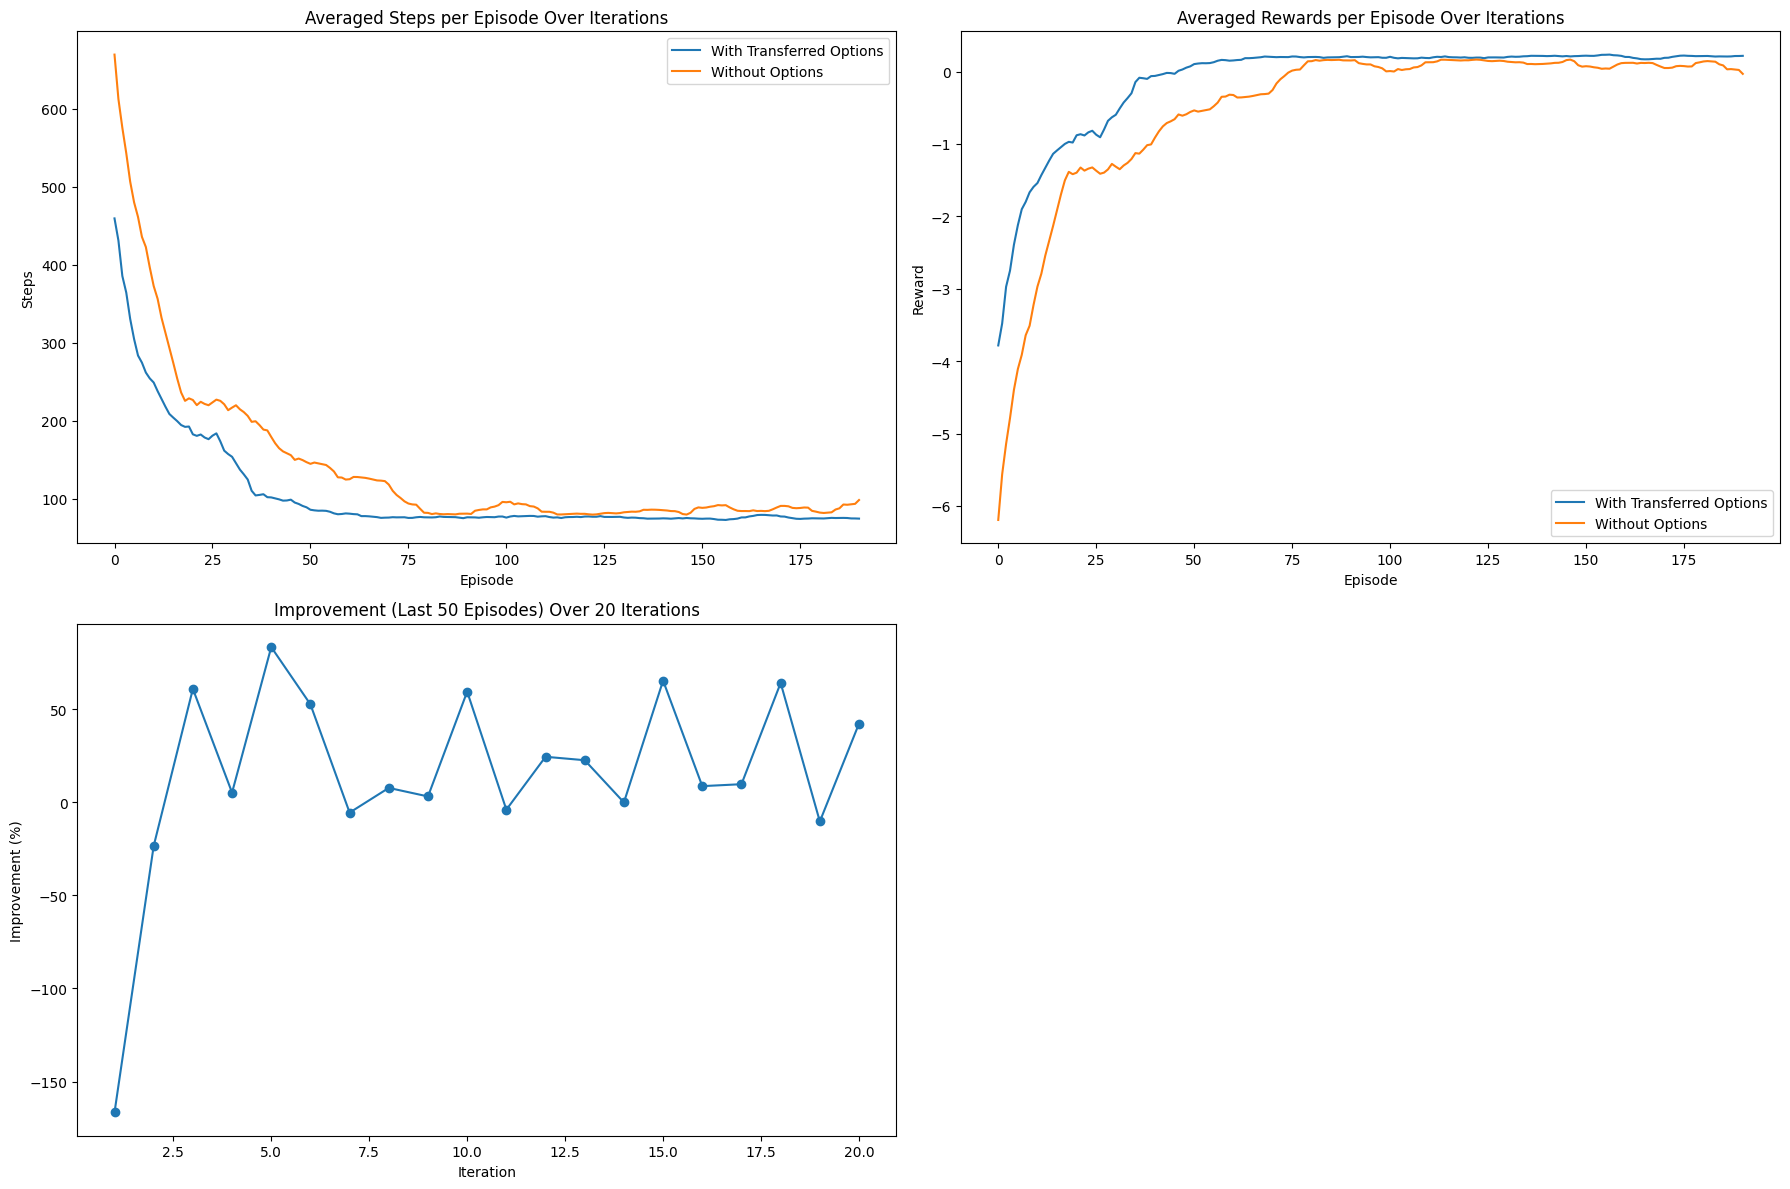


Final Summary Across Iterations:
Iteration 1: Avg Steps With Options = 60.10, Without Options = 22.54, Improvement = -166.64%
Iteration 2: Avg Steps With Options = 32.50, Without Options = 26.34, Improvement = -23.39%
Iteration 3: Avg Steps With Options = 19.50, Without Options = 50.02, Improvement = 61.02%
Iteration 4: Avg Steps With Options = 20.50, Without Options = 21.64, Improvement = 5.27%
Iteration 5: Avg Steps With Options = 19.76, Without Options = 119.66, Improvement = 83.49%
Iteration 6: Avg Steps With Options = 26.34, Without Options = 55.70, Improvement = 52.71%
Iteration 7: Avg Steps With Options = 21.94, Without Options = 20.80, Improvement = -5.48%
Iteration 8: Avg Steps With Options = 20.08, Without Options = 21.78, Improvement = 7.81%
Iteration 9: Avg Steps With Options = 21.66, Without Options = 22.38, Improvement = 3.22%
Iteration 10: Avg Steps With Options = 19.42, Without Options = 48.00, Improvement = 59.54%
Iteration 11: Avg Steps With Options = 22.42, Without 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import defaultdict
import time

# Define the four-room environment

class FourRoomEnvironment:
    def __init__(self, width=11, height=11, walls=None, doors=None, start_pos=(1, 1), goal_pos=(9, 9)):
        self.width = width
        self.height = height
        self.start_pos = start_pos
        self.goal_pos = goal_pos
        self.agent_pos = start_pos
        self.agent_dir = 0  # 0: right, 1: down, 2: left, 3: up

        # Initialize grid with boundary walls
        self.grid = np.ones((height, width), dtype=int)  # 1 represents walls

        # Clear the interior
        for i in range(1, height-1):
            for j in range(1, width-1):
                self.grid[i, j] = 0  # 0 represents empty cells

        # Add walls for four rooms if not specified
        if walls is None:
            # Vertical wall
            for i in range(1, height-1):
                if i != height // 2:
                    self.grid[i, width // 2] = 1

            # Horizontal wall
            for j in range(1, width-1):
                if j != width // 2:
                    self.grid[height // 2, j] = 1
        else:
            # Add custom walls
            for x, y in walls:
                self.grid[y, x] = 1

        # Add doors
        if doors is None:
            doors = [(width // 2, height // 4), (width // 4, height // 2),
                     (width // 2, 3 * height // 4), (3 * width // 4, height // 2)]
        self.doors = doors
        for x, y in doors:
            self.grid[y, x] = 2  # 2 represents doors

        # Mark goal
        self.grid[goal_pos[1], goal_pos[0]] = 3  # 3 represents goal

        # Reset agent position
        self.reset()

    def reset(self):
        self.agent_pos = self.start_pos
        self.agent_dir = 0
        return self.get_agent_space_state()

    def step(self, action):
        # Actions: 0 = turn left, 1 = turn right, 2 = move forward
        reward = -0.01  # Small negative reward for each step
        done = False

        if action == 0:  # Turn left
            self.agent_dir = (self.agent_dir - 1) % 4
        elif action == 1:  # Turn right
            self.agent_dir = (self.agent_dir + 1) % 4
        elif action == 2:  # Move forward
            # Calculate new position based on direction
            dx, dy = [(1, 0), (0, 1), (-1, 0), (0, -1)][self.agent_dir]
            new_x, new_y = self.agent_pos[0] + dx, self.agent_pos[1] + dy

            # Check if new position is valid
            if 0 <= new_x < self.width and 0 <= new_y < self.height:
                cell_type = self.grid[new_y, new_x]
                if cell_type in [0, 2, 3]:  # Empty, door, or goal
                    self.agent_pos = (new_x, new_y)
                    if cell_type == 3:  # Goal reached
                        reward = 1.0
                        done = True

        return self.get_agent_space_state(), reward, done

    def get_agent_space_state(self):
        # Defines agent space state in egocentric coordinates
        front_dir = [(1, 0), (0, 1), (-1, 0), (0, -1)][self.agent_dir]
        left_dir = [(0, -1), (1, 0), (0, 1), (-1, 0)][self.agent_dir]
        right_dir = [(0, 1), (-1, 0), (0, -1), (1, 0)][self.agent_dir]

        x, y = self.agent_pos
        front_x, front_y = x + front_dir[0], y + front_dir[1]
        left_x, left_y = x + left_dir[0], y + left_dir[1]
        right_x, right_y = x + right_dir[0], y + right_dir[1]

        front_type = self.grid[front_y, front_x] if (0 <= front_x < self.width and 0 <= front_y < self.height) else 1
        left_type = self.grid[left_y, left_x] if (0 <= left_x < self.width and 0 <= left_y < self.height) else 1
        right_type = self.grid[right_y, right_x] if (0 <= right_x < self.width and 0 <= right_y < self.height) else 1

        goal_x, goal_y = self.goal_pos
        agent_x, agent_y = self.agent_pos
        dx, dy = goal_x - agent_x, goal_y - agent_y

        # Rotate coordinates based on agent direction
        if self.agent_dir == 0:
            goal_dx, goal_dy = dx, dy
        elif self.agent_dir == 1:
            goal_dx, goal_dy = -dy, dx
        elif self.agent_dir == 2:
            goal_dx, goal_dy = -dx, -dy
        elif self.agent_dir == 3:
            goal_dx, goal_dy = dy, -dx

        if abs(goal_dx) > abs(goal_dy):
            goal_dir = 0 if goal_dx > 0 else 2
        else:
            goal_dir = 1 if goal_dy > 0 else 3

        return (front_type, left_type, right_type, self.agent_dir, goal_dir)

    def render(self):
        render_grid = np.copy(self.grid)
        x, y = self.agent_pos
        render_grid[y, x] = 4 + self.agent_dir  # 4-7 denote agent orientations

        for i in range(self.height):
            for j in range(self.width):
                cell = render_grid[i, j]
                if cell == 0:
                    print('.', end=' ')
                elif cell == 1:
                    print('#', end=' ')
                elif cell == 2:
                    print('D', end=' ')
                elif cell == 3:
                    print('G', end=' ')
                elif cell == 4:
                    print('>', end=' ')
                elif cell == 5:
                    print('v', end=' ')
                elif cell == 6:
                    print('<', end=' ')
                elif cell == 7:
                    print('^', end=' ')
            print()
        print()


# Successor Representation with online learning

class SuccessorRepresentation:
    def __init__(self, gamma=0.9, learning_rate=0.1):
        self.gamma = gamma
        self.learning_rate = learning_rate
        self.M = defaultdict(lambda: defaultdict(float))
        self.state_counts = defaultdict(int)

    def update(self, state, next_state):
        self.state_counts[state] += 1
        for s_prime in self.state_counts:
            indicator = 1.0 if s_prime == next_state else 0.0
            current = self.get_successor_value(state, s_prime)
            target = indicator + self.gamma * self.get_successor_value(next_state, s_prime)
            self.M[state][s_prime] = current + self.learning_rate * (target - current)

    def get_successor_value(self, state, successor_state):
        return self.M[state][successor_state]

    def get_sr_matrix(self):
        states = list(self.state_counts.keys())
        n = len(states)
        matrix = np.zeros((n, n))
        state_to_idx = {state: i for i, state in enumerate(states)}
        for i, state in enumerate(states):
            for j, successor_state in enumerate(states):
                matrix[i, j] = self.get_successor_value(state, successor_state)
        return matrix, states, state_to_idx


# Eigenoption discovery

def discover_eigenoptions(sr, num_options=4):
    sr_matrix, states, state_to_idx = sr.get_sr_matrix()
    try:
        eigenvalues, eigenvectors = np.linalg.eig(sr_matrix)
        idx = np.abs(eigenvalues).argsort()[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]
        eigenvalues = eigenvalues[1:num_options+1]
        eigenvectors = eigenvectors[:, 1:num_options+1]
        return eigenvectors, eigenvalues, states, state_to_idx
    except np.linalg.LinAlgError:
        print("Error in eigendecomposition. Using random options instead.")
        n = len(states)
        eigenvectors = np.random.rand(n, num_options)
        eigenvalues = np.random.rand(num_options)
        return eigenvectors, eigenvalues, states, state_to_idx

# Option class

class Option:
    def __init__(self, option_idx, eigenvector, states, state_to_idx):
        self.option_idx = option_idx
        self.eigenvector = eigenvector
        self.states = states
        self.state_to_idx = state_to_idx
        self.Q = defaultdict(lambda: np.zeros(3))  # Actions: left, right, forward
        self.epsilon = 0.1
        self.alpha = 0.1
        self.gamma = 0.99
        self.terminations = set()
        self.max_steps = 10

    def get_intrinsic_reward(self, state, next_state):
        if state in self.state_to_idx and next_state in self.state_to_idx:
            s_idx = self.state_to_idx[state]
            s_next_idx = self.state_to_idx[next_state]
            return self.eigenvector[s_next_idx] - self.eigenvector[s_idx]
        return 0

    def choose_action(self, state):
        if random.random() < self.epsilon:
            return random.randint(0, 2)
        else:
            return np.argmax(self.Q[state])

    def update(self, state, action, reward, next_state, done):
        best_next_action = np.argmax(self.Q[next_state])
        td_target = reward + self.gamma * self.Q[next_state][best_next_action] * (not done)
        td_error = td_target - self.Q[state][action]
        self.Q[state][action] += self.alpha * td_error
        if done or self.get_intrinsic_reward(state, next_state) < 0:
            self.terminations.add(state)

    def should_terminate(self, state):
        return state in self.terminations

    def execute(self, env, state):
        steps = 0
        total_reward = 0
        done = False
        while not done and steps < self.max_steps and not self.should_terminate(state):
            action = self.choose_action(state)
            next_state, reward, done = env.step(action)
            total_reward += reward
            intrinsic_reward = self.get_intrinsic_reward(state, next_state)
            self.update(state, action, intrinsic_reward, next_state, done)
            state = next_state
            steps += 1
        return state, total_reward, done, steps

# Q-learning agent with options

class QLearningWithOptions:
    def __init__(self, num_actions=3, options=None):
        self.Q = defaultdict(lambda: np.zeros(num_actions + (0 if options is None else len(options))))
        self.options = options if options is not None else []
        self.epsilon = 0.1
        self.alpha = 0.1
        self.gamma = 0.99

    def choose_action(self, state):
        num_actions = 3 + len(self.options)
        if random.random() < self.epsilon:
            return random.randint(0, num_actions - 1)
        else:
            return np.argmax(self.Q[state])

    def update(self, state, action, reward, next_state, done, env):
        if action < 3:
            best_next_action = np.argmax(self.Q[next_state])
            td_target = reward + self.gamma * self.Q[next_state][best_next_action] * (not done)
            td_error = td_target - self.Q[state][action]
            self.Q[state][action] += self.alpha * td_error
            return next_state, reward, done, 1
        else:
            option = self.options[action - 3]
            next_state, option_reward, option_done, option_steps = option.execute(env, state)
            best_next_action = np.argmax(self.Q[next_state])
            td_target = option_reward + self.gamma * self.Q[next_state][best_next_action] * (not option_done)
            td_error = td_target - self.Q[state][action]
            self.Q[state][action] += self.alpha * td_error
            return next_state, option_reward, option_done, option_steps

# Function to train an agent (tracking steps and rewards)

def train_agent(env, agent, sr=None, num_episodes=200, learn_sr=False):
    episode_steps = []
    episode_rewards = []
    for episode in range(num_episodes):
        state = env.reset()
        done = False
        episode_reward = 0
        steps = 0
        while not done and steps < 1000:
            action = agent.choose_action(state)
            if action < 3:
                next_state, reward, done = env.step(action)
                episode_reward += reward
                agent.update(state, action, reward, next_state, done, env)
                if learn_sr and sr is not None:
                    sr.update(state, next_state)
                state = next_state
                steps += 1
            else:
                next_state, option_reward, option_done, option_steps = agent.update(state, action, 0, None, False, env)
                state = next_state
                done = option_done
                episode_reward += option_reward
                steps += option_steps
        episode_steps.append(steps)
        episode_rewards.append(episode_reward)
        if (episode + 1) % 10 == 0:
            print(f"Episode {episode + 1}, Steps: {steps}, Reward: {episode_reward:.2f}")
    return episode_steps, episode_rewards

# Function to train options

def train_options(env, options, num_episodes=100):
    for i, option in enumerate(options):
        print(f"Training option {i+1}...")
        for episode in range(num_episodes):
            state = env.reset()
            done = False
            steps = 0
            while not done and steps < 1000:
                action = option.choose_action(state)
                next_state, reward, done = env.step(action)
                intrinsic_reward = option.get_intrinsic_reward(state, next_state)
                option.update(state, action, intrinsic_reward, next_state, done)
                state = next_state
                steps += 1
            if (episode + 1) % 10 == 0:
                print(f"Option {i+1}, Episode {episode + 1}, Steps: {steps}")

# A helper function to generate a random target environment.
def generate_random_target_env(width=11, height=11):
    # Random walls: choose random number between 2 and 6 walls
    num_walls = random.randint(2, 6)
    walls = []
    # Avoid borders (i.e., from 1 to width-2, height-2)
    for _ in range(num_walls):
        x = random.randint(1, width-2)
        y = random.randint(1, height-2)
        # Avoid placing wall at start or goal
        if (x, y) not in [(1,1), (9,9)]:
            walls.append((x,y))
    # Random doors: choose 1 to 3 random door positions
    num_doors = random.randint(1,3)
    doors = []
    for _ in range(num_doors):
        x = random.randint(1, width-2)
        y = random.randint(1, height-2)
        if (x,y) not in walls and (x, y) not in [(1,1), (9,9)]:
            doors.append((x,y))
    # Create environment with random walls and doors
    env = FourRoomEnvironment(walls=walls, doors=doors)
    return env

# Main experiment function: Run for 20 iterations with random target environments

def run_experiment():
    # First, set up the source environment and learn SR and options on it.
    source_env = generate_random_target_env()  # Standard environment
    print("Source environment:")
    source_env.render()

    sr = SuccessorRepresentation()
    print("Exploring source environment to build successor representation...")
    random_agent = QLearningWithOptions()
    random_agent.epsilon = 1.0  # Fully random for exploration
    _ , _ = train_agent(source_env, random_agent, sr, num_episodes=1000, learn_sr=True)

    print("Discovering eigenoptions from SR...")
    eigenvectors, eigenvalues, states, state_to_idx = discover_eigenoptions(sr, num_options=4)
    options = []
    for i in range(min(4, eigenvectors.shape[1])):
        options.append(Option(i, eigenvectors[:, i], states, state_to_idx))
    print("Training options in source environment...")
    train_options(source_env, options, num_episodes=100)

    # Prepare to record results over multiple iterations.
    iterations = 20
    all_steps_with = []
    all_rewards_with = []
    all_steps_without = []
    all_rewards_without = []
    improvements = []  # Improvement values per iteration (based on last 50 episodes average steps)

    for it in range(iterations):
        print(f"\nIteration {it+1}/{iterations}:")
        target_env = generate_random_target_env()
        print("Randomized Target Environment:")
        target_env.render()

        # Create two agents: one with transferred options, one plain
        agent_with_options = QLearningWithOptions(options=options)
        agent_without_options = QLearningWithOptions()

        print("Training agent in target environment WITH transferred options...")
        steps_with, rewards_with = train_agent(target_env, agent_with_options, num_episodes=200)
        print("Training agent in target environment WITHOUT options...")
        steps_without, rewards_without = train_agent(target_env, agent_without_options, num_episodes=200)

        all_steps_with.append(steps_with)
        all_rewards_with.append(rewards_with)
        all_steps_without.append(steps_without)
        all_rewards_without.append(rewards_without)

        # Compute improvement on steps (average of last 50 episodes)
        avg_with = np.mean(steps_with[-50:])
        avg_without = np.mean(steps_without[-50:])
        improvement = (avg_without - avg_with) / avg_without * 100 if avg_without != 0 else 0
        improvements.append(improvement)
        print(f"Iteration {it+1} Improvement: {improvement:.2f}%")

    # Plot aggregated results
    plt.figure(figsize=(18, 12))

    # Plot averaged learning curves (steps)
    plt.subplot(2, 2, 1)
    mean_steps_with = np.mean(all_steps_with, axis=0)
    mean_steps_without = np.mean(all_steps_without, axis=0)
    window = 10
    steps_with_smooth = np.convolve(mean_steps_with, np.ones(window)/window, mode='valid')
    steps_without_smooth = np.convolve(mean_steps_without, np.ones(window)/window, mode='valid')
    plt.plot(steps_with_smooth, label='With Transferred Options')
    plt.plot(steps_without_smooth, label='Without Options')
    plt.xlabel('Episode')
    plt.ylabel('Steps')
    plt.title('Averaged Steps per Episode Over Iterations')
    plt.legend()

    # Plot averaged learning curves (rewards)
    plt.subplot(2, 2, 2)
    mean_rewards_with = np.mean(all_rewards_with, axis=0)
    mean_rewards_without = np.mean(all_rewards_without, axis=0)
    rewards_with_smooth = np.convolve(mean_rewards_with, np.ones(window)/window, mode='valid')
    rewards_without_smooth = np.convolve(mean_rewards_without, np.ones(window)/window, mode='valid')
    plt.plot(rewards_with_smooth, label='With Transferred Options')
    plt.plot(rewards_without_smooth, label='Without Options')
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.title('Averaged Rewards per Episode Over Iterations')
    plt.legend()

    # Plot improvement per iteration
    plt.subplot(2, 2, 3)
    plt.plot(range(1, iterations+1), improvements, marker='o')
    plt.xlabel('Iteration')
    plt.ylabel('Improvement (%)')
    plt.title('Improvement (Last 50 Episodes) Over 20 Iterations')

    plt.tight_layout()
    plt.savefig('option_transfer_randomized_results.png')
    plt.show()

    # Print final summary
    print("\nFinal Summary Across Iterations:")
    for i in range(iterations):
        print(f"Iteration {i+1}: Avg Steps With Options = {np.mean(all_steps_with[i][-50:]):.2f}, Without Options = {np.mean(all_steps_without[i][-50:]):.2f}, Improvement = {improvements[i]:.2f}%")

if __name__ == "__main__":
    start_time = time.time()
    run_experiment()
    end_time = time.time()
    print(f"Total execution time: {end_time - start_time:.2f} seconds")